In [31]:
import pandas as pd

In [32]:
import random

In [33]:
df=pd.read_csv('../data/emotion.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/emotion.csv'

In [ ]:
def generate_tweet_id():
    return '16' + ''.join([str(random.randint(0, 9)) for _ in range(8)])

# Cell 4: Generate a list of unique tweet IDs
unique_ids = set()
while len(unique_ids) < len(df):
    unique_ids.add(generate_tweet_id())
unique_ids = list(unique_ids)

In [ ]:
df['tweet_id'] = unique_ids
df.head()  # Display the first few rows to check the new column

In [ ]:
df.to_csv('../data/emotion_with_ids.csv', index=False)
print("Tweet IDs added and saved to '../data/emotion_with_ids.csv'")

In [ ]:
df=pd.read_csv('../data/emotion_with_ids.csv')
df.head()  # Display the first few rows to check the data

In [ ]:
print("Current columns:", df.columns)

In [ ]:
df = df[['tweet_id', 'Emotion', 'Text']]

In [ ]:
df.to_csv('../data/emotion_with_ids_1.csv', index=False)
print("Columns reordered and saved to '../data/emotion_with_ids_1.csv'")

In [ ]:
df1 = pd.read_csv('../data/emotion_1.csv')
df2 = pd.read_csv('../data/emotion_2.csv')

In [ ]:
merged_df = pd.concat([df1, df2], ignore_index=True)

In [ ]:
merged_df.to_csv('../data/emotion_merged.csv', index=False)
print("Files merged and saved to '../data/emotion_merged.csv'")

In [37]:
merged_df = pd.read_csv('../data/emotion_merged.csv')

In [40]:
duplicate_ids = merged_df[merged_df.duplicated(subset='tweet_id', keep=False)]

In [41]:
# Display duplicate rows if any
if not duplicate_ids.empty:
    print("Duplicate tweet_ids found:")
    print(duplicate_ids)
else:
    print("No duplicate tweet_ids found.")

Duplicate tweet_ids found:
         tweet_id  Emotion                                               Text
24390  1694834428  disgust  Can parents teach kids how to cover their mout...
59191  1694834428  sadness      STILL TRYING TO GET THIS ALL FIGURED OUT?!!!!


In [42]:
emotion_counts = merged_df.groupby('Emotion')['Text'].count()

In [43]:
print(emotion_counts)

Emotion
anger          4407
boredom         179
disgust         856
empty           827
enthusiasm      759
fear           5410
fun            1776
happiness      5209
hate           1323
joy           11045
love           3842
neutral       10892
relief         1526
sadness       11887
shame           146
surprise       6249
worry          8459
Name: Text, dtype: int64


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\assma\AppData\Local\Temp\ipykernel_18096\1037524812.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")


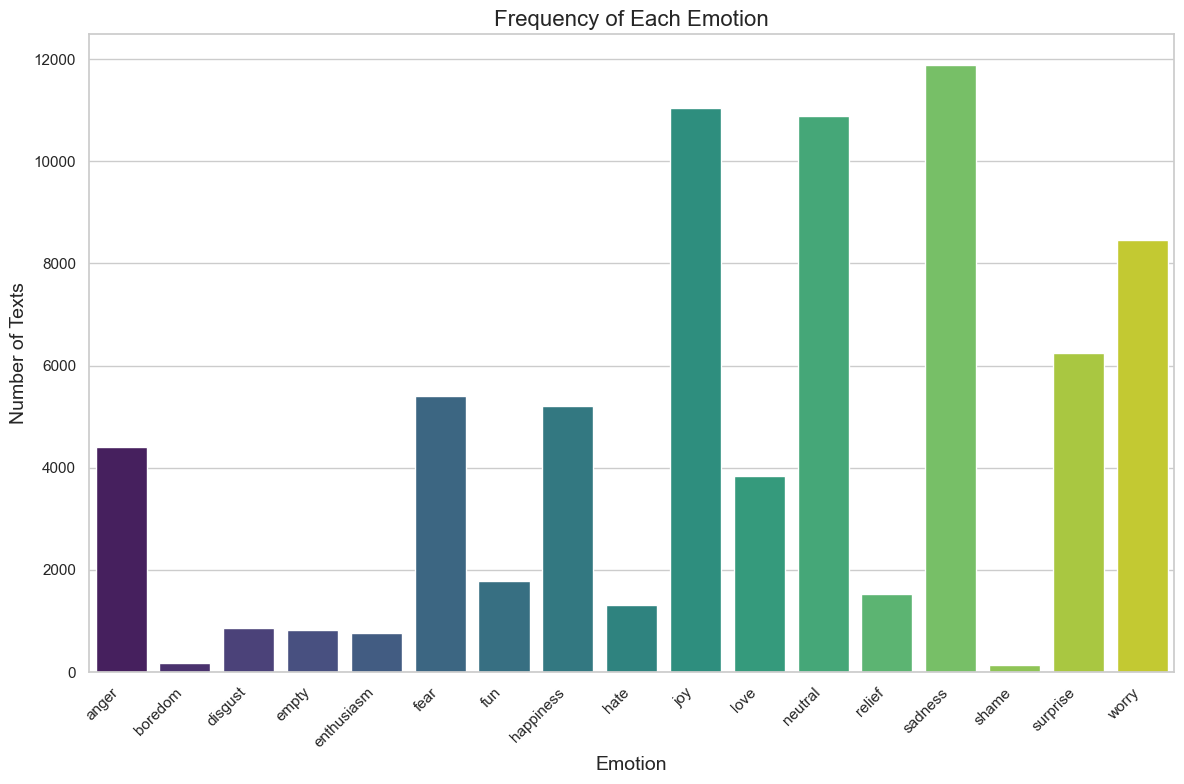

In [46]:
sns.set(style="whitegrid")

# Create a bar plot to show the frequency of each emotion
plt.figure(figsize=(12, 8))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")

# Title and labels
plt.title('Frequency of Each Emotion', fontsize=16)
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Number of Texts', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

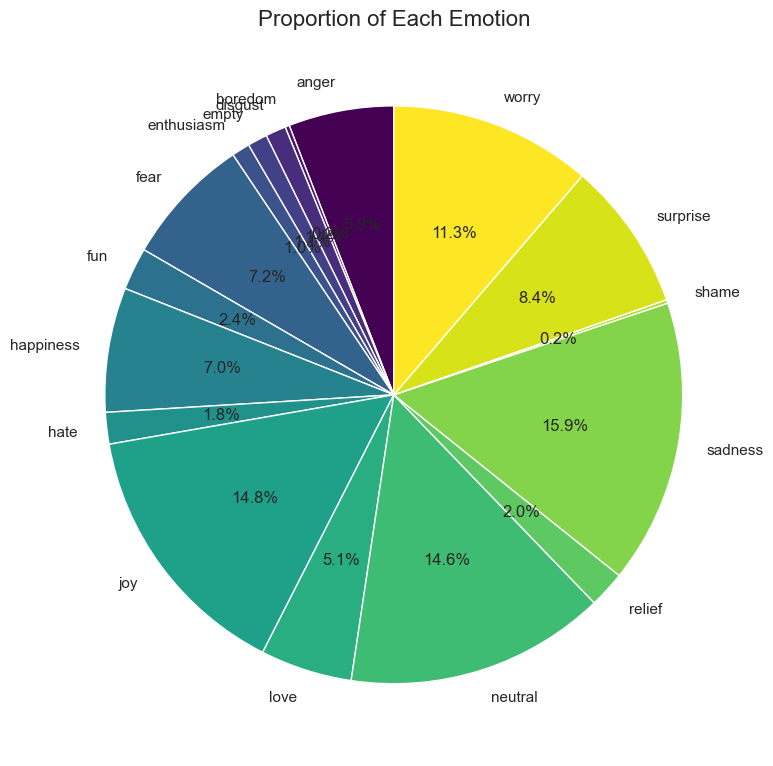

In [47]:
plt.figure(figsize=(8, 8))
emotion_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis', legend=False)

# Title and labels for the pie chart
plt.title('Proportion of Each Emotion', fontsize=16)
plt.ylabel('')  # Hide the y-axis label for aesthetics

# Show the pie chart
plt.tight_layout()
plt.show()

<h1>Data Pre-processing in merged csv <h1>

In [50]:
import re

# Function to clean text by removing unwanted characters and converting to lowercase
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabet characters
    text = text.lower()  # Convert to lowercase
    return text

# Apply the cleaning function to the 'Text' column
merged_df['Text'] = merged_df['Text'].apply(clean_text)


In [54]:
from nltk.corpus import stopwords

# Ensure stopwords are downloaded
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    words = text.split()  # Split text into words
    cleaned_words = [word for word in words if word not in stop_words]
    return ' '.join(cleaned_words)

# Apply the function to the 'Text' column and create 'Cleaned_Text' column
merged_df['Cleaned_Text'] = merged_df['Text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\assma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
merged_df[['Text', 'Cleaned_Text']].head()

,Text,Cleaned_Text
0,,
1,sage act upgrade list tommorow,sage act upgrade list tommorow
2,way homegirl baby funeral man hate funerals re...,way homegirl baby funeral man hate funerals re...
3,eye true hazel eyeand brilliant regular featur...,eye true hazel eyeand brilliant regular featur...
4,iluvmiasantos ugh babe hugggzzz u babe naamaze...,iluvmiasantos ugh babe hugggzzz u babe naamaze...


In [ ]:
from nltk.corpus import stopwords

# Download stopwords if necessary
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Function to remove stopwords from text
def remove_stopwords(text):
    words = text.split()  # Split text into words
    cleaned_words = [word for word in words if word.lower() not in stop_words]  # Use lower() to handle case insensitivity
    return ' '.join(cleaned_words)

# Apply the function to the 'Text' column and store the result in a new column 'Cleaned_Text'
merged_df['Cleaned_Text'] = merged_df['Text'].apply(remove_stopwords)

# Check the first few rows for comparison
merged_df[['Text', 'Cleaned_Text']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\assma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,Cleaned_Text
0,,
1,sage act upgrade list tommorow,sage act upgrade list tommorow
2,way homegirl baby funeral man hate funerals re...,way homegirl baby funeral man hate funerals re...
3,eye true hazel eyeand brilliant regular featur...,eye true hazel eyeand brilliant regular featur...
4,iluvmiasantos ugh babe hugggzzz u babe naamaze...,iluvmiasantos ugh babe hugggzzz u babe naamaze...


In [57]:
merged_df[['Text', 'Cleaned_Text']].head(30)

,Text,Cleaned_Text
0,,
1,sage act upgrade list tommorow,sage act upgrade list tommorow
2,way homegirl baby funeral man hate funerals re...,way homegirl baby funeral man hate funerals re...
3,eye true hazel eyeand brilliant regular featur...,eye true hazel eyeand brilliant regular featur...
4,iluvmiasantos ugh babe hugggzzz u babe naamaze...,iluvmiasantos ugh babe hugggzzz u babe naamaze...
5,im expecting extremely important phonecall min...,im expecting extremely important phonecall min...
6,couldnt wait see live missing nh wasnt painful...,couldnt wait see live missing nh wasnt painful...
7,maken tip stop op een moment dat je het hele p...,maken tip stop op een moment dat je het hele p...
8,en dan krijg je ff een cadeautje van een tweep...,en dan krijg je ff een cadeautje van een tweep...
9,drummer boy bij op verzoek van biemoosterhof f...,drummer boy bij op verzoek van biemoosterhof f...
